In [1]:
# Install dependencies using pip in the docker container
# https://medium.com/@shivangisareen/for-anyone-using-jupyter-notebook-installing-packages-18a9468d0c1c
import sys
!{sys.executable} -m pip install plotly pandas dataclasses_json stylecloud jieba 
!{sys.executable} -m pip install -U kaleido
# Done with installation, so the following code will be clean (without the dependencies output, and re-running all the time

# Dataset

The dataset is collected using Spotify API and Genius API. 

For a singer, we fetch all his/her albums, and subsequently fetch all the tracks within the album. For each track that we fetched, we also fetch the audio features and the lyrics. In the end, combining all the data into a `json` file.

In [3]:
from IPython.display import Image

# To run after editing, use shift+enter

##############################################################################################################

# import data structure
# coding

from cmath import sin
import customdatatypes
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# gosh this comment saves lives
import plotly.io as pio
pio.renderers.default = "iframe" # https://github.com/plotly/plotly.py/issues/2508#issuecomment-907338746

import os
import stylecloud
import jieba

# Plot 
def show_image(path: str):
    display(Image(filename=f"{path}"))

# Load data
english_singer_names = [
    "Taylor Swift",
    "Justin Bieber",
    "Sia",
    "Miley Cyrus",
]

chinese_singer_names = [
    "Jay Chou",
    "JJ Lin",
]

english_singers = []
for singer_name in english_singer_names:
    with open(f'data/{singer_name}.json', 'r') as infile:
        singer = customdatatypes.Singer.from_json(infile.read())
        english_singers.append(singer)

chinese_singers = []
for singer_name in chinese_singer_names:
    with open(f'data/{singer_name}.json', 'r') as infile:
        singer = customdatatypes.Singer.from_json(infile.read())
        chinese_singers.append(singer)
        

# Dataset basics

Currently we collected data from 6 singers, 4 English speaking and 2 Chinese speaking. 

Because Spotify doesn't directly provide lyrics, so we have to use Genius to obtain the lyrics. For live concert tracks, often, the lyrics are missing. 

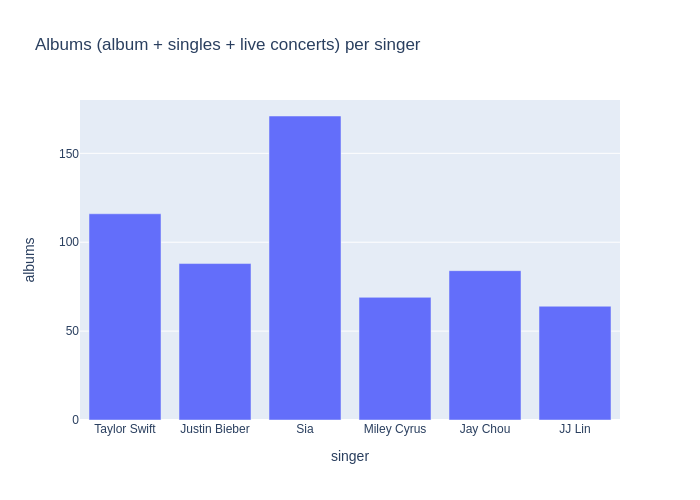

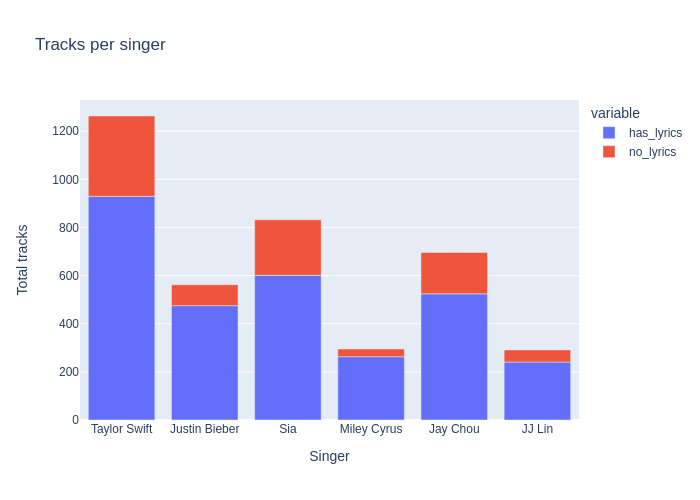

In [4]:
# data set basic data
def draw_album_info(singers: list[customdatatypes.Singer]): # bar chart
    singer_names = []
    album_count = []
    for singer in singers:
        singer_names.append(singer.name)
        album_count.append(len(singer.albums))
    
    dataframe = pd.DataFrame(dict(singer=singer_names, albums=album_count))
    fig = px.bar(dataframe, x=dataframe.singer, y=dataframe.albums, title="Albums (album + singles + live concerts) per singer")
    # fig.show()
    os.system(f"mkdir -p out/basics")
    fig.write_image(f"out/basics/singers.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/basics/singers.png")
    show_image(f"out/basics/singers.png")

def draw_track_and_lyrics_availbility(singers: list[customdatatypes.Singer]): # bar chart
    singer_names = []
    with_lyrics = []
    without_lyrics = []
    for singer in singers:
        singer_names.append(singer.name)
        tracks_with_lyrics = 0
        tracks_without_lyrics = 0
        for album in singer.albums:
            for track in album.tracks:
                if len(track.lyrics) == 0:
                    tracks_without_lyrics += 1
                else:
                    tracks_with_lyrics += 1
        with_lyrics.append(tracks_with_lyrics)
        without_lyrics.append(tracks_without_lyrics)
    
    dataframe = pd.DataFrame({'Singer': singer_names,
                               'has_lyrics': with_lyrics,
                               'no_lyrics': without_lyrics})    
    fig = px.bar(dataframe, x=dataframe.Singer, y=[dataframe.has_lyrics, dataframe.no_lyrics], title="Tracks per singer")
    fig.update_yaxes(title="Total tracks")
    # fig.show()
    os.system(f"mkdir -p out/basics")
    fig.write_image(f"out/basics/tracks.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/basics/tracks.png")
    show_image(f"out/basics/tracks.png")

draw_album_info(singers=english_singers + chinese_singers)
draw_track_and_lyrics_availbility(singers=english_singers + chinese_singers)

# [Audio features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

# (Aspect 1) The general characteristics of all the singer’s songs

The following graphs represents all tracks performed by a particular singer.

By looking at the radar graph, we can see the singer's signitures, as one singer might be more energetic than another, etc.

draw_audio_feature_of_all_songs_from_a_singer Taylor Swift


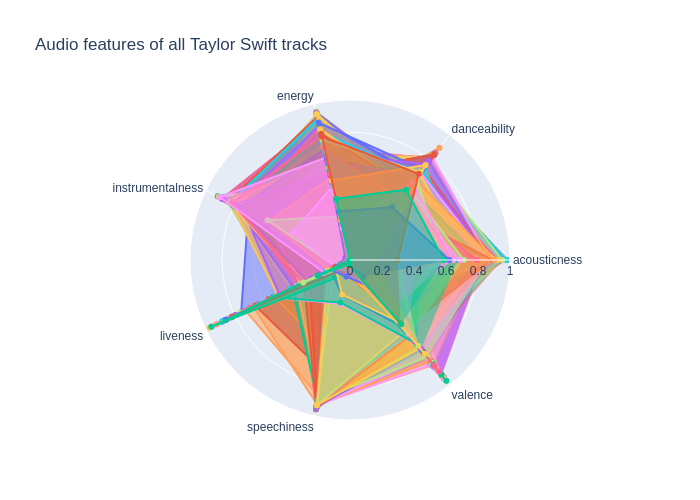

draw_audio_feature_of_all_songs_from_a_singer Justin Bieber


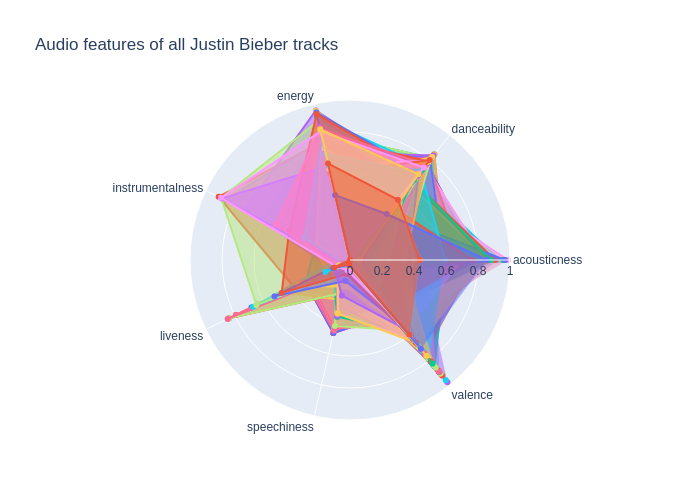

draw_audio_feature_of_all_songs_from_a_singer Sia


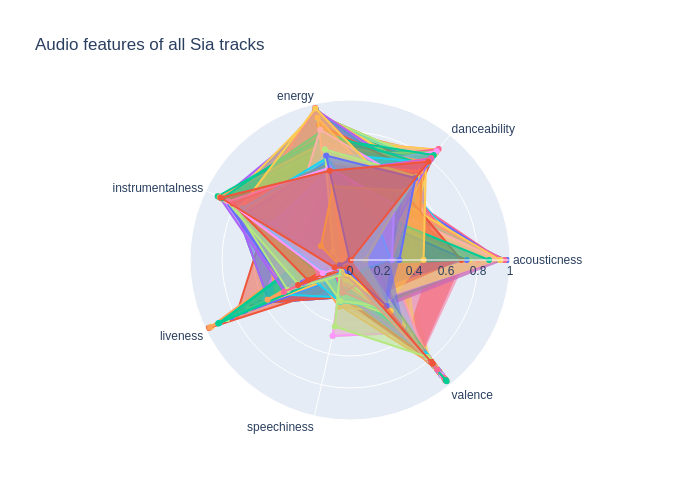

draw_audio_feature_of_all_songs_from_a_singer Miley Cyrus


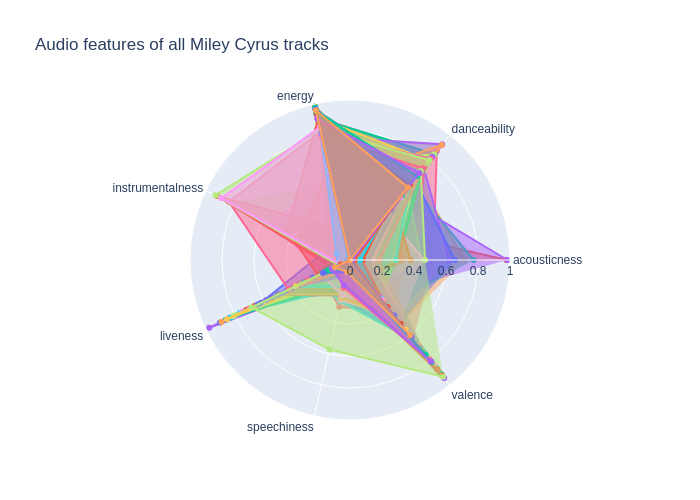

draw_audio_feature_of_all_songs_from_a_singer Jay Chou


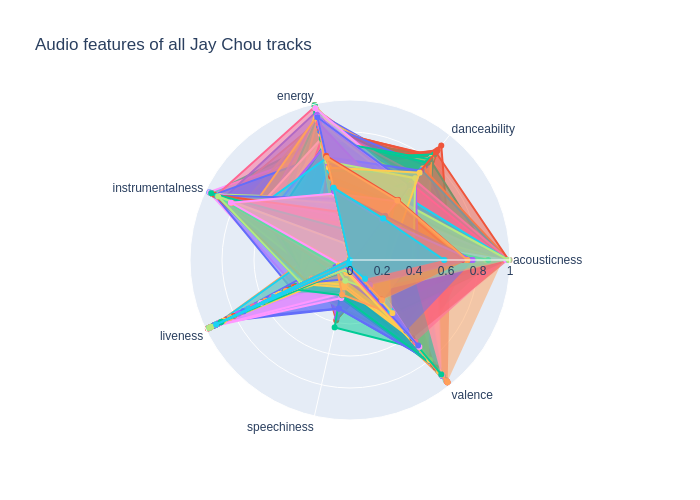

draw_audio_feature_of_all_songs_from_a_singer JJ Lin


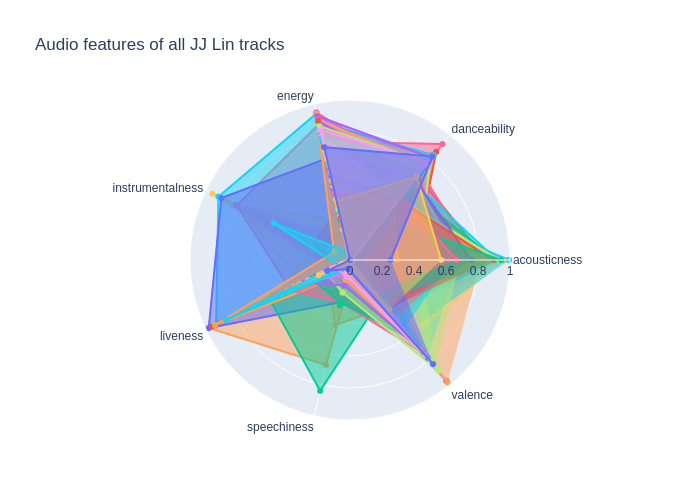

In [5]:
# audio features
def draw_audio_feature_of_all_songs_from_a_singer(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_of_all_songs_from_a_singer {singer.name}")
    
    categories = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'liveness',
        'speechiness',
        'valence'
    ]
    fig = go.Figure()

    for album in singer.albums:
        for track in album.tracks:
            fig.add_trace(go.Scatterpolar(
                r=[
                    track.acousticness,
                    track.danceability,
                    track.energy,
                    track.instrumentalness,
                    track.liveness,
                    track.speechiness,
                    track.valence
                ],
                theta=categories,
                fill='toself',
                name=f"{track.name}"
            ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=False
    )

    fig.update_layout(title_text=f"Audio features of all {singer.name} tracks")
    # fig.show()
    os.system(f"mkdir -p out/radar")
    fig.write_image(f"out/radar/{singer.name}.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/radar/{singer.name}.png")
    show_image(f"out/radar/{singer.name}.png")

def draw_audio_feature_of_all_albums_from_a_singer(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_of_all_albums_from_a_singer {singer.name}")
    
    categories = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'liveness',
        'speechiness',
        'valence'
    ]
    fig = go.Figure()

    for album in singer.albums:
        for track in album.tracks:
            fig.add_trace(go.Scatterpolar(
                r=[
                    track.acousticness,
                    track.danceability,
                    track.energy,
                    track.instrumentalness,
                    track.liveness,
                    track.speechiness,
                    track.valence
                ],
                theta=categories,
                fill='toself',
                name=f"{track.name}"
            ))

        print(f"draw_audio_feature_of_all_albums_from_a_singer {singer.name} {album.name}")
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 1]
                )),
            showlegend=False
        )

        fig.update_layout(title_text=f"{singer.name} - {album.name}")
        # fig.show()
        os.system(f"mkdir -p \"out/{singer.name}\"")
        fig.write_image(f"out/{singer.name}/{album.name}.svg")
        
        # for jupyter, use png, due to performance reason
        fig.write_image(f"out/{singer.name}/{album.name}.svg")
        show_image(f"out/{singer.name}/{album.name}.svg")


for singer in english_singers:
    draw_audio_feature_of_all_songs_from_a_singer(singer=singer)
    # draw_audio_feature_of_all_albums_from_a_singer(singer=singer)

for singer in chinese_singers:
    draw_audio_feature_of_all_songs_from_a_singer(singer=singer)
    

# (Aspect 2) The frequency statistics of the lyrics

For all 6 singers, we would like to know what are their most used words, so we can perform more further analysis. 

Sidenotes: for Chinese singers, we segmented the sentences beforehand, using Jieba. 

draw_word_cloud_for_english_singer Taylor Swift


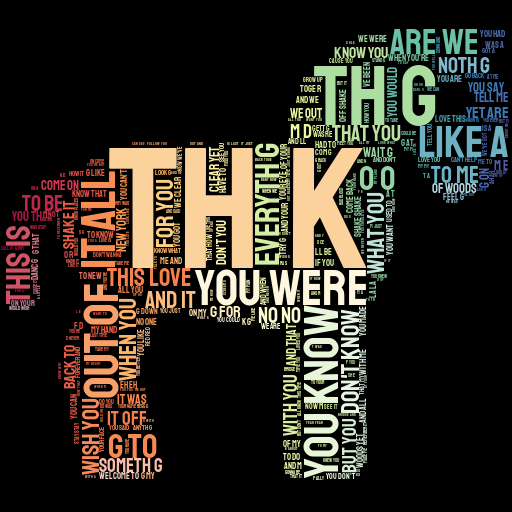

draw_word_cloud_for_english_singer Justin Bieber


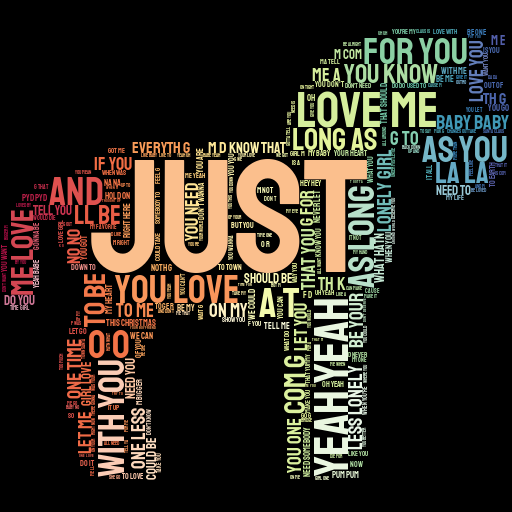

draw_word_cloud_for_english_singer Sia


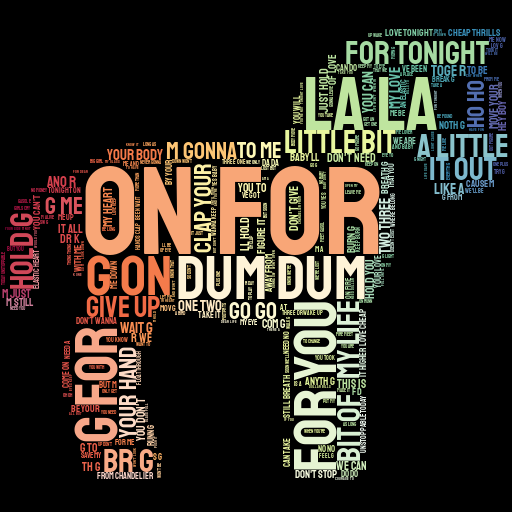

draw_word_cloud_for_english_singer Miley Cyrus


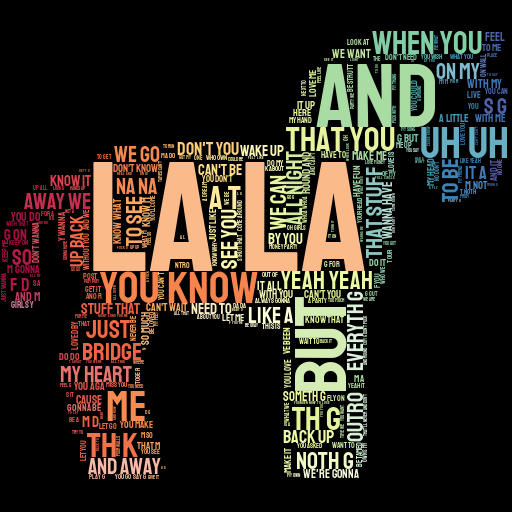

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


draw_word_cloud_for_chinese_singer Jay Chou


Loading model cost 0.548 seconds.
Prefix dict has been built successfully.


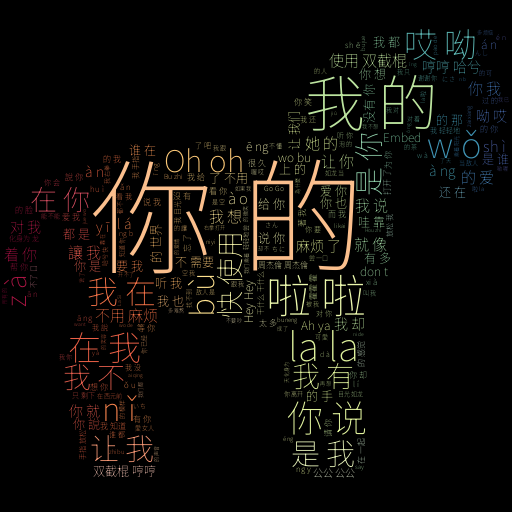

draw_word_cloud_for_chinese_singer JJ Lin


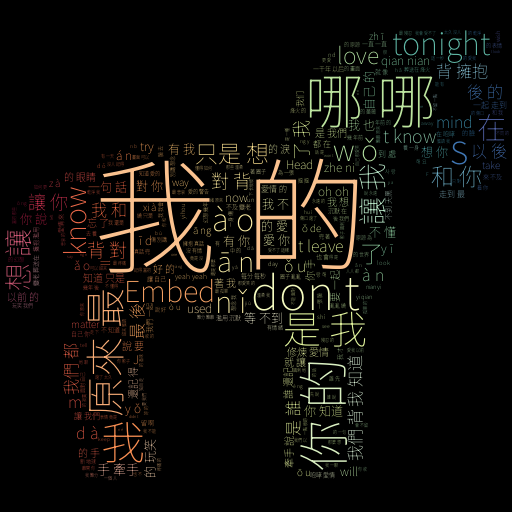

In [6]:
# word cloud
def draw_word_cloud_for_english_singer(singer: customdatatypes.Singer):
    print(f"draw_word_cloud_for_english_singer {singer.name}")
    
    text = ""
    for album in singer.albums:
        for track in album.tracks:
            if len(track.lyrics) > 0:
                text += " " + track.lyrics.replace("oh", " ").replace("I", " ").replace("in", " ").replace("the", " ")

    os.system(f"mkdir -p \"out/word_cloud\"")
    name_split = singer.name.split(" ")
    english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
    english_stop_words += name_split
    stylecloud.gen_stylecloud(text=text,
                                icon_name='fas fa-horse',
                                palette='colorbrewer.diverging.Spectral_11',
                                custom_stopwords=english_stop_words,
                                background_color='black',
                                gradient='horizontal',
                                output_name=f"out/word_cloud/{singer.name}.png")
    show_image(path=f"out/word_cloud/{singer.name}.png")

def draw_word_cloud_for_chinese_singer(singer: customdatatypes.Singer):
    # https://blog.csdn.net/qq_42374697/article/details/106269448
    print(f"draw_word_cloud_for_chinese_singer {singer.name}")
    
    text = ""
    for album in singer.albums:
        for track in album.tracks:
            if len(track.lyrics) > 0:
                # print(" ".join(jieba.cut(track.lyrics)))
                text += " " + " ".join(jieba.cut(track.lyrics))

    os.system(f"mkdir -p \"out/word_cloud\"")
    name_split = singer.name.split(" ")
    english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
    english_stop_words += name_split
    stylecloud.gen_stylecloud(text=text,
                                icon_name='fas fa-horse',
                                palette='colorbrewer.diverging.Spectral_11',
                                font_path='NotoSansCJKsc-VF.otf', # https://github.com/googlefonts/noto-cjk/tree/main/Sans
                                stopwords=True,
                                custom_stopwords=english_stop_words,
                                add_stopwords=True,
                                background_color='black',
                                gradient='horizontal',
                                output_name=f"out/word_cloud/{singer.name}.png")
    show_image(path=f"out/word_cloud/{singer.name}.png")
    
for singer in english_singers:
    draw_word_cloud_for_english_singer(singer=singer)

for singer in chinese_singers:
    draw_word_cloud_for_chinese_singer(singer=singer)


# (Aspect 3) The evolution of the singer’s musical style

For all the singers, we would like to know how does the audio feature changes over time. 

For each graph, the x-axis is the sorted album release time, and the y-axis is a particular audio feature of all the tracks within a given album. By looking at the graph from left to right, we can see how the singer evolves over time.

draw_audio_feature_change_over_time Taylor Swift


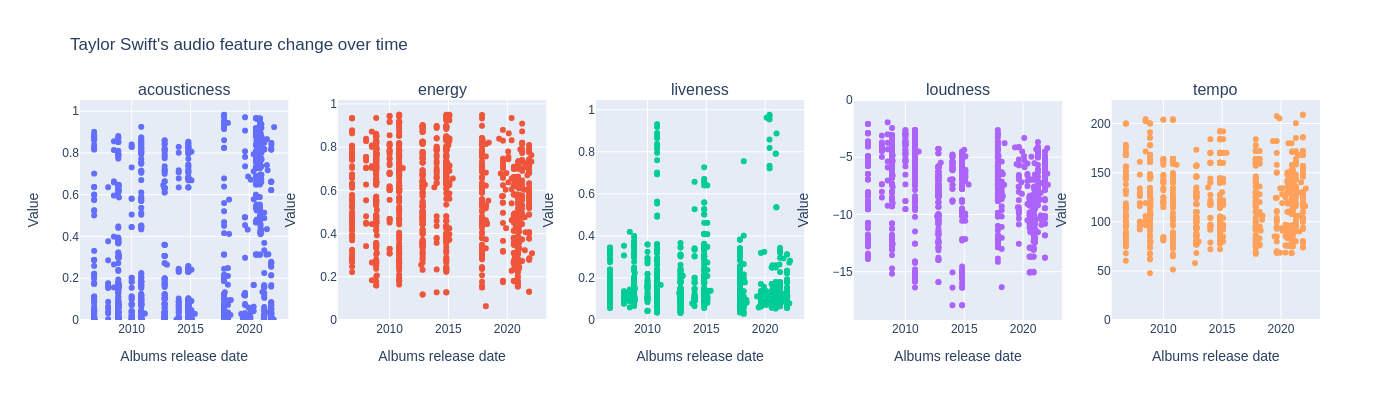

draw_audio_feature_change_over_time Justin Bieber


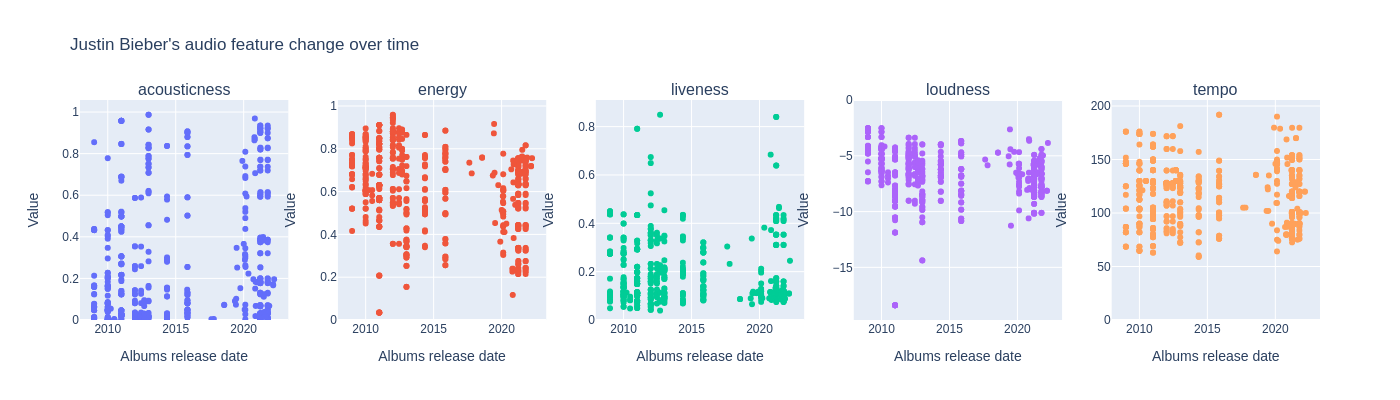

draw_audio_feature_change_over_time Sia


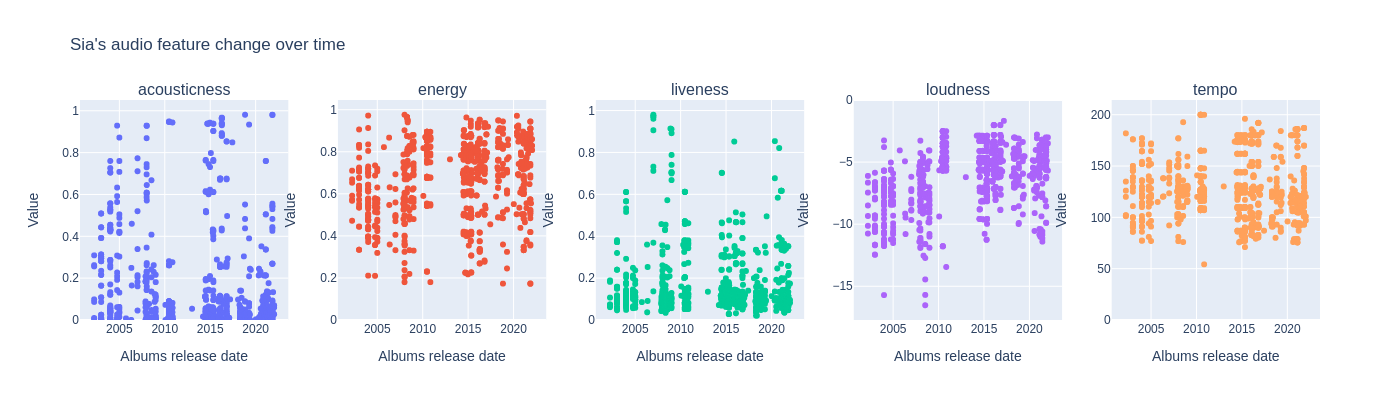

draw_audio_feature_change_over_time Miley Cyrus


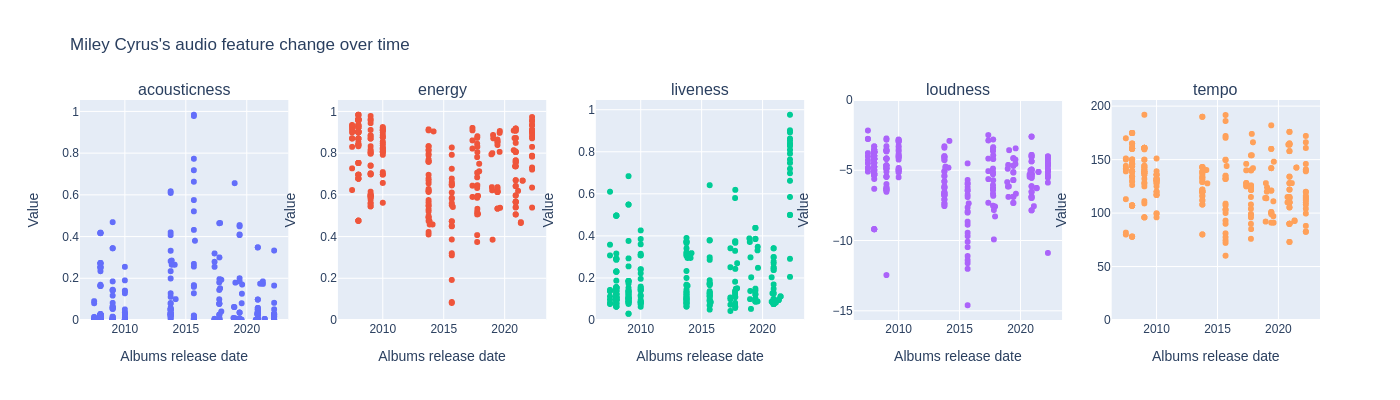

draw_audio_feature_change_over_time Jay Chou


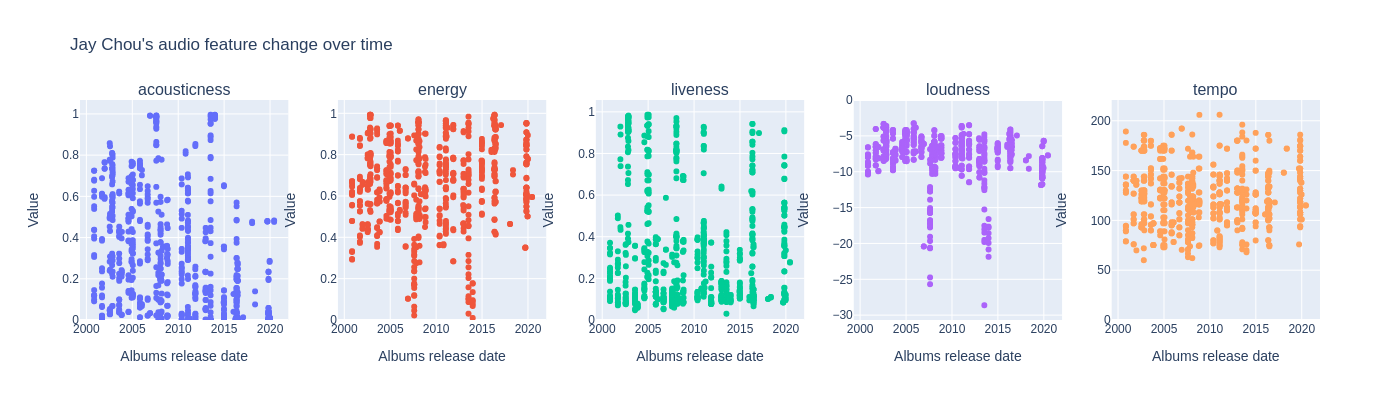

draw_audio_feature_change_over_time JJ Lin


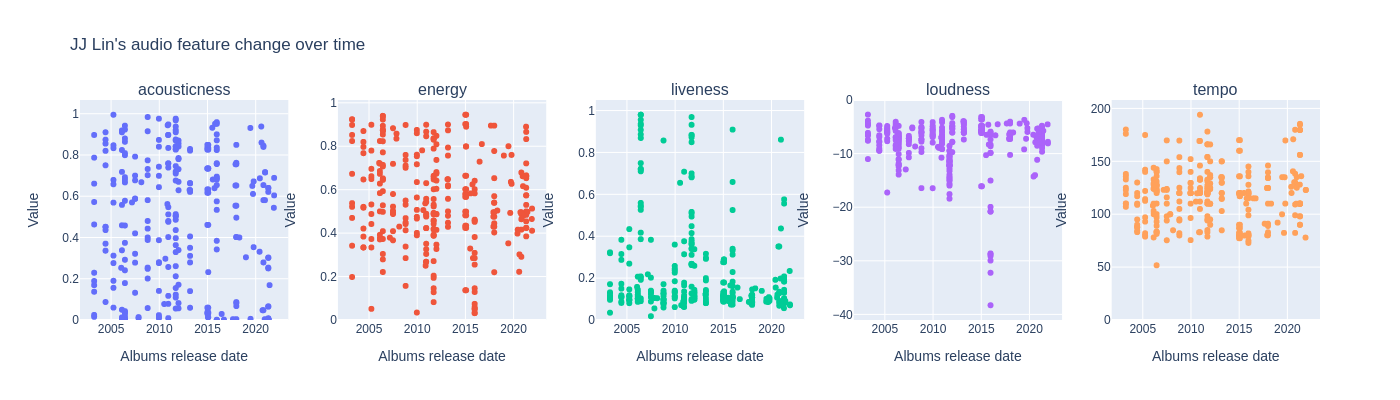

In [7]:
# audio feature changes over time for a singer
def draw_audio_feature_change_over_time(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_change_over_time {singer.name}")
    
    fig = make_subplots(rows=1, cols=5, subplot_titles=('acousticness', 'energy', 'liveness', 'loudness', 'tempo'))
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.acousticness)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=1)
    fig.update_xaxes(title="Albums release date", row=1, col=1, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=1, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.energy)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=2)
    fig.update_xaxes(title="Albums release date", row=1, col=2, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=2, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.liveness)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=3)
    fig.update_xaxes(title="Albums release date", row=1, col=3, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=3, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.loudness)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=4)
    fig.update_xaxes(title="Albums release date", row=1, col=4, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=4, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.tempo)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=5)
    fig.update_xaxes(title="Albums release date", row=1, col=5, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=5, rangemode="tozero")
    
    fig.update_layout(height=400, width=1400, title_text=f"{singer.name}'s audio feature change over time")
    
    # fig.show() # will have weird bug during rendering
    os.system(f"mkdir -p \"out/audio_feature\"")
    fig.write_image(f"out/audio_feature/{singer.name}.png")
    show_image(f"out/audio_feature/{singer.name}.png")

for singer in english_singers+chinese_singers:
    draw_audio_feature_change_over_time(singer=singer)

# (Aspect 4) The variations in the characteristics of popular music

We use QQ music to obtain the trendy musics on both Billboards and in China.

Notice that in 2022, only 14 weeks of data is available so far.

In [8]:
import json
import re

def load_qq_data(id: int) -> {}:
    base_folder=f'data/qq'
    folder=f"{base_folder}/{id}"
    
    ret = {}
    for y in range(2018, 2022 + 1):
        ret[y] = {}
        for w in range(1, 52 + 1):
            if y == 2022 and w > 14:
                break
            try:
                with open(f'{folder}/{y}_{w}.json', encoding='utf-8') as infile:
                    data = json.load(infile)
                    
                    ret[y][w] = {}
                    for (i, track) in enumerate(data['data']['list']):
                        ret[y][w][i] = {}
                        ret[y][w][i]['title'] = track['title']
                        ret[y][w][i]['singerName'] = track['singerName']
                        ret[y][w][i]['mid'] = track['mid']
                        try:
                            mid = track['mid']
                            title = track['title']
                            title = title.replace("/", " ")
                            with open(f'{base_folder}/lyrics/{mid}_{title}.json', encoding='utf-8') as lyrics_file:
                                data = json.load(lyrics_file)
                                str_without_brackets = re.sub("[\(\[].*?[\)\]]", "", data['data']['lyric']) # TODO: remove more terms from the first couple of lines
                                ret[y][w][i]['lyrics'] = str_without_brackets
                        except Exception as e:
                            print(e, f'{base_folder}/lyrics/{mid}_{title}.json')
                            pass
            except Exception as e:
                print(e, f'{folder}/{y}_{w}.json')
                pass
    return ret

print("Start loading trend_data_Chinese")
trend_data_Chinese = load_qq_data(id=26)
print("Done loading trend_data_Chinese")
print("Start loading trend_data_billboard")
trend_data_billboard = load_qq_data(id=108)
print("Done loading trend_data_billboard")

Start loading trend_data_Chinese
[Errno 2] No such file or directory: 'data/qq/26/2018_52.json' data/qq/26/2018_52.json
[Errno 2] No such file or directory: 'data/qq/26/2019_52.json' data/qq/26/2019_52.json
Done loading trend_data_Chinese
Start loading trend_data_billboard
[Errno 2] No such file or directory: 'data/qq/108/2018_1.json' data/qq/108/2018_1.json
Done loading trend_data_billboard


**The following graph is the number of unique songs that has been recorded on the top 100 weekly music board**

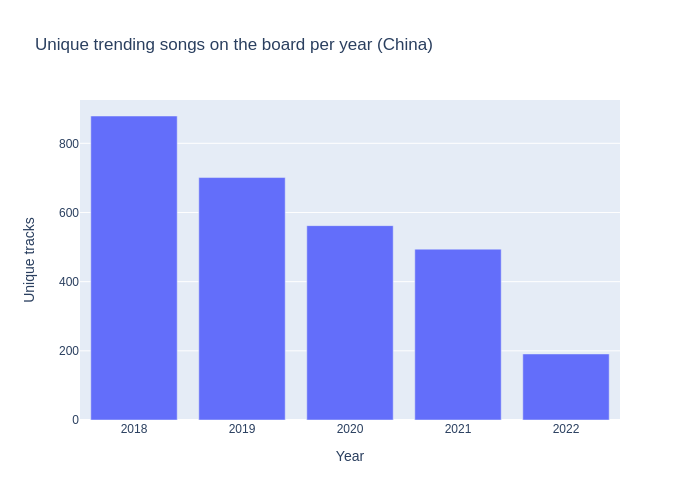

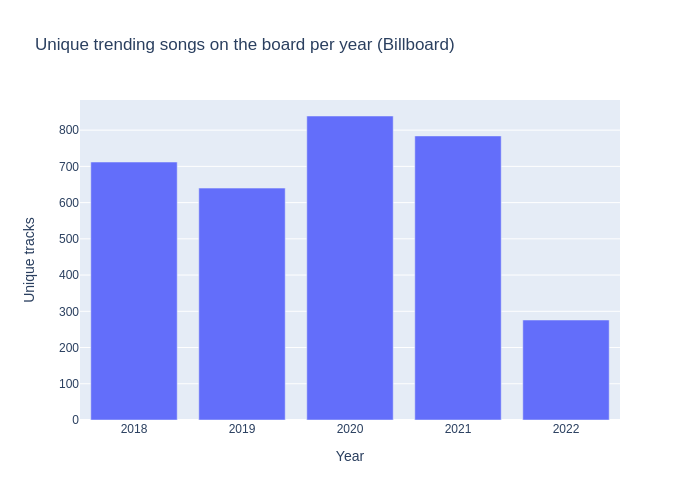

In [9]:
def get_unique_songs_per_year(data: {}, title: str): # bar chart
    year = []
    count = []
    for y in data:
        year.append(y)
        tmp = {}
        for w in data[y]:
            for t in data[y][w]:
                tmp[data[y][w][t]['title']] = True
        count.append(len(tmp))
    
    # print(count)
    
    fig = px.bar(x=year, y=count, title=f"{title}")
    fig.update_xaxes(title="Year")
    fig.update_yaxes(title="Unique tracks")
    # fig.show()
    os.system(f"mkdir -p out/qq")
    fig.write_image(f"out/qq/get_unique_songs_per_year.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/qq/get_unique_songs_per_year.png")
    show_image(f"out/qq/get_unique_songs_per_year.png")

get_unique_songs_per_year(data=trend_data_Chinese, title="Unique trending songs on the board per year (China)")
get_unique_songs_per_year(data=trend_data_billboard, title="Unique trending songs on the board per year (Billboard)")

In [10]:
def popular_singers_by_unique_songs_on_board_per_year(data: {}): # a) bar chart (x: songs on board (max ~50) b) y: singer count)
    for y in data:
        singers = {}
        for w in data[y]:
            for t in data[y][w]:
                singer_split = data[y][w][t]['singerName'].split("/")
                
                for s in singer_split:
                    if s in singers:
                        pass
                    else:
                        singers[s] = {}
                    singers[s][data[y][w][t]['title']] = True
                        
        # print(y, len(singers))
        count = {}
        for s in singers:
            # print(s, len(singers[s]))
            if len(singers[s]) in count:
                pass
            else:
                count[len(singers[s])] = 0
            count[len(singers[s])] += 1
        
        mx = 0
        for c in count:
            # print(y, c, count[c])
            mx = max(mx, c)
        print("mx", y, mx)
        
popular_singers_by_unique_songs_on_board_per_year(data=trend_data_Chinese)
popular_singers_by_unique_songs_on_board_per_year(data=trend_data_billboard)

mx 2018 22
mx 2019 39
mx 2020 42
mx 2021 43
mx 2022 42
mx 2018 39
mx 2019 22
mx 2020 47
mx 2021 41
mx 2022 20


**The following graph shows how many unique songs does each singer has on the top 100 board since 2018**

For example, we can see that there are 656 singers that managed to have 1 song from their discography being listed on the Chinese top 100 music board, since 2018.

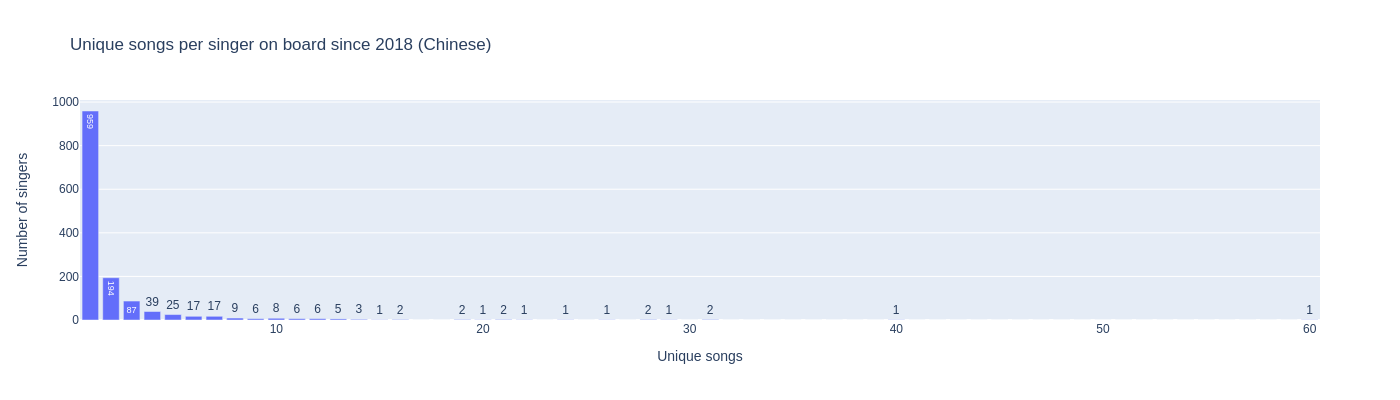

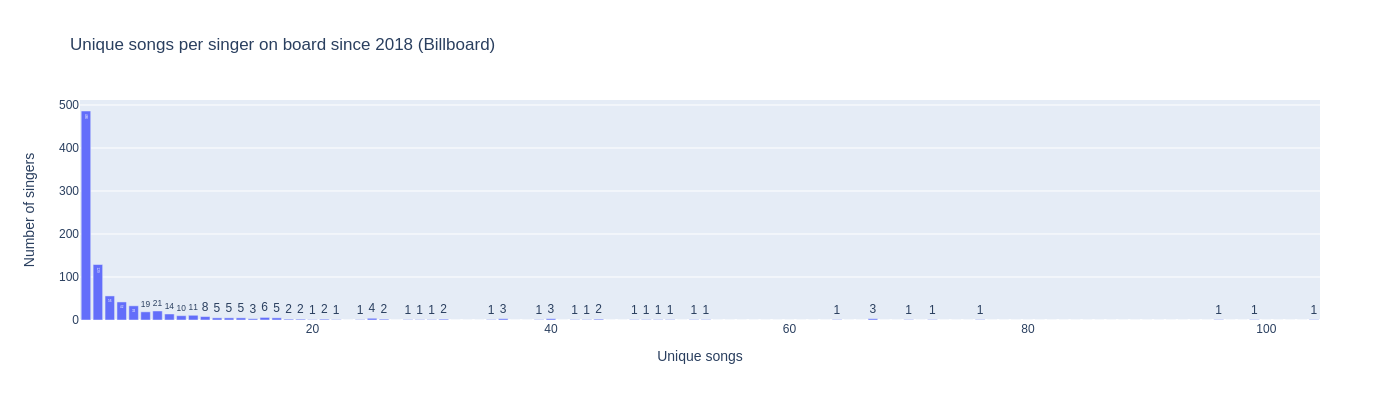

In [11]:
def popular_singers_by_unique_songs_on_board_all(data: {}, title: str): # a) bar chart (x: songs on board (max ~110), y: singer count) b) table
    singers = {}
    for y in data:
        for w in data[y]:
            for t in data[y][w]:
                singer_split = data[y][w][t]['singerName'].split("/")
                
                for s in singer_split:
                    if s in singers:
                        pass
                    else:
                        singers[s] = {}
                    singers[s][data[y][w][t]['title']] = True
                        
    # print(len(singers))
    count = {}
    for s in singers:
        # print(s, len(singers[s]))
        if len(singers[s]) in count:
            pass
        else:
            count[len(singers[s])] = 0
        count[len(singers[s])] += 1

    mx = 0
    for c in count:
        # print(c, count[c])
        mx = max(mx, c)
    # print("mx", mx)
    
    x = []
    y = []
    for i in range(1, mx + 1):
        x.append(i)
        if i in count:
            y.append(count[i])
        else:
            y.append(0)
    
    fig = px.bar(x=x, y=y, title=f"{title}", text_auto='3s')
    fig.update_xaxes(title="Unique songs")
    fig.update_yaxes(title="Number of singers")
    fig.update_layout(height=400, width=1400)
    # fig.show()
    os.system(f"mkdir -p out/qq")
    fig.write_image(f"out/qq/popular_singers_by_unique_songs_on_board_all.svg")

    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/qq/popular_singers_by_unique_songs_on_board_all.png")
    show_image(f"out/qq/popular_singers_by_unique_songs_on_board_all.png")

popular_singers_by_unique_songs_on_board_all(data=trend_data_Chinese, title="Unique songs per singer on board since 2018 (Chinese)")
popular_singers_by_unique_songs_on_board_all(data=trend_data_billboard, title="Unique songs per singer on board since 2018 (Billboard)")

# (Aspect 5) The song which is long-standing in the top 100 music board

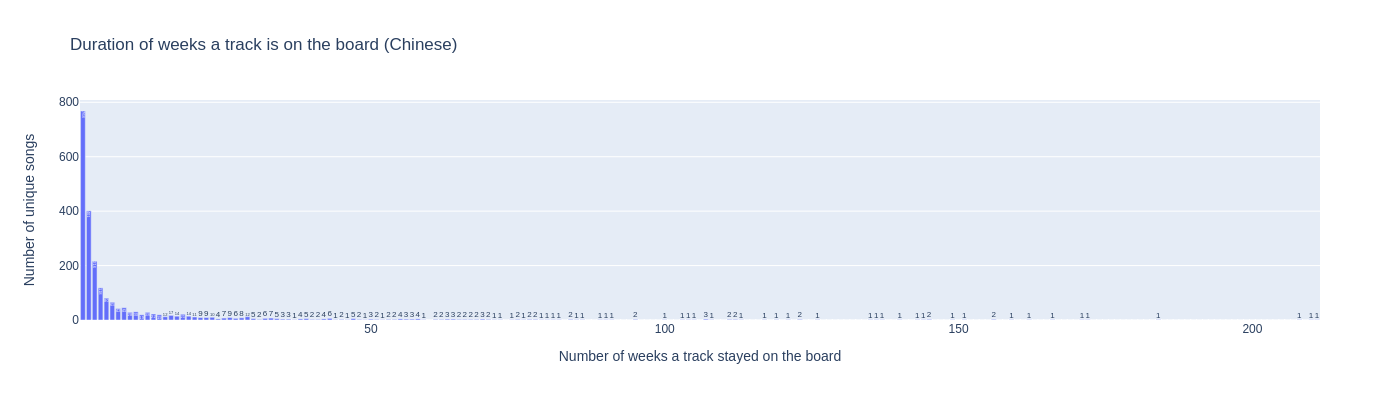

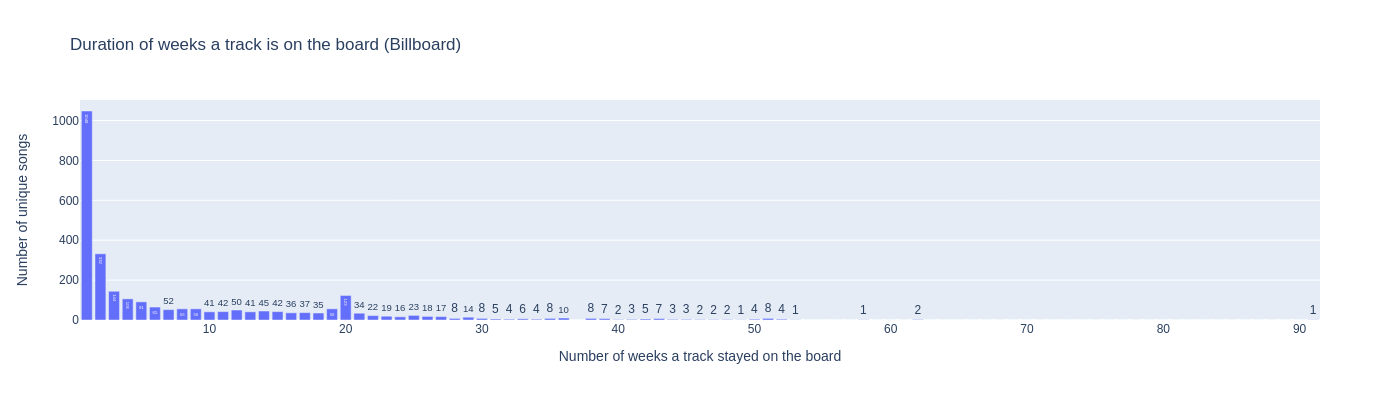

In [12]:
def time_song_on_board_per_year(data: {}, title: str): # bar chart (x: on board week count, y: song count) b) table
    tracks = {}
    for y in data:
        for w in data[y]:
            for t in data[y][w]:                
                if data[y][w][t]['title'] in tracks:
                    pass
                else:
                    tracks[data[y][w][t]['title']] = 0
                tracks[data[y][w][t]['title']] += 1
                        
    # print(len(tracks))
    count = {}
    for t in tracks:
        # print(s, len(singers[s]))
        if tracks[t] in count:
            pass
        else:
            count[tracks[t]] = 0
        count[tracks[t]] += 1

    mx = 0
    for c in count:
        # print(c, count[c])
        mx = max(mx, c)
    # print("mx", mx)
    
    x = []
    y = []
    for i in range(1, mx + 1):
        x.append(i)
        if i in count:
            y.append(count[i])
        else:
            y.append(0)
    
    fig = px.bar(x=x, y=y, title=f"{title}", text_auto='10s')
    fig.update_xaxes(title="Number of weeks a track stayed on the board")
    fig.update_yaxes(title="Number of unique songs")
    fig.update_layout(height=400, width=1400)
    # fig.show()
    os.system(f"mkdir -p out/qq")
    fig.write_image(f"out/qq/popular_singers_by_unique_songs_on_board_all.svg")

    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/qq/popular_singers_by_unique_songs_on_board_all.png")
    show_image(f"out/qq/popular_singers_by_unique_songs_on_board_all.png")

time_song_on_board_per_year(data=trend_data_Chinese, title="Duration of weeks a track is on the board (Chinese)")
time_song_on_board_per_year(data=trend_data_billboard, title="Duration of weeks a track is on the board (Billboard)")

**The following garph shows the word cloud using the lyrics from the songs on the board from 2018, 2019, 2020, 2021, 2022**

year 2018


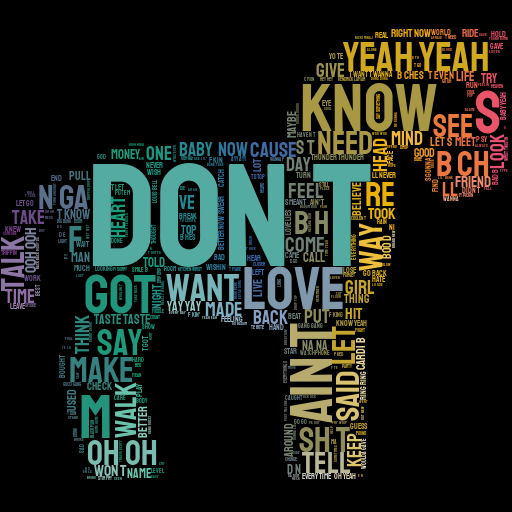

year 2019


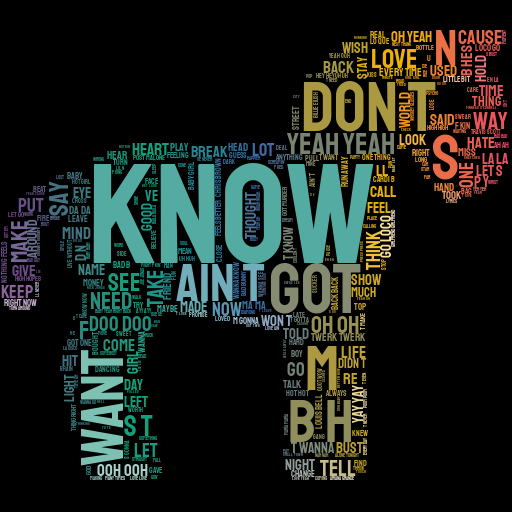

year 2020


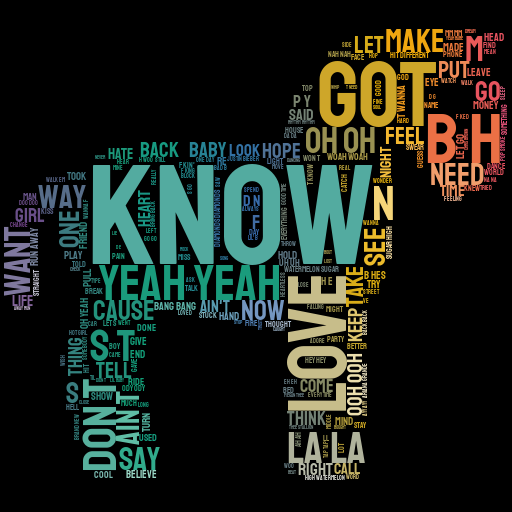

year 2021


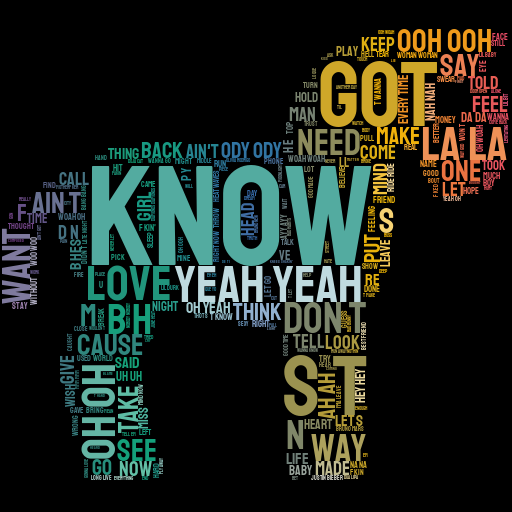

year 2022


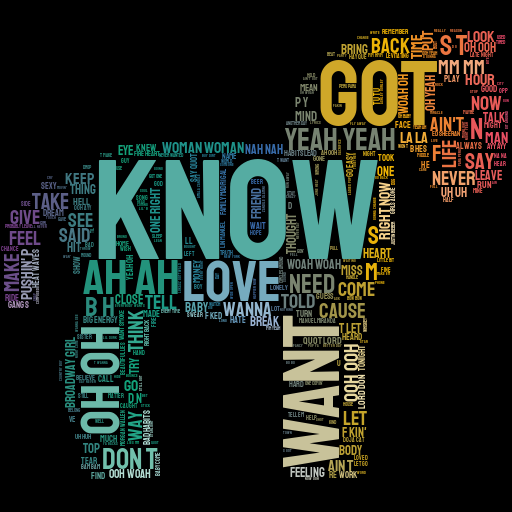

In [13]:
def english_word_cloud_per_year(data: {}):
    for y in data:
        text = ""
        for w in data[y]:
            for t in data[y][w]: 
                if len(data[y][w][t]['lyrics']) > 0:
                    text += " " + data[y][w][t]['lyrics'].replace("&apos;", " ")
                
        os.system(f"mkdir -p \"out/word_cloud\"")
        stylecloud.gen_stylecloud(text=text,
                                    icon_name='fas fa-horse',
                                    background_color='black',
                                    gradient='horizontal',
                                    output_name=f"out/word_cloud/english_{y}.png")
        print(f"year {y}")
        show_image(path=f"out/word_cloud/english_{y}.png")

# def chinese_word_cloud_per_year(data: {}):
#     text += " " + " ".join(jieba.cut(track.lyrics))
    
#     os.system(f"mkdir -p \"out/word_cloud\"")
#     name_split = singer.name.split(" ")
#     english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
#     english_stop_words += name_split
#     stylecloud.gen_stylecloud(text=text,
#                                 icon_name='fas fa-horse',
#                                 palette='colorbrewer.diverging.Spectral_11',
#                                 font_path='NotoSansCJKsc-VF.otf', # https://github.com/googlefonts/noto-cjk/tree/main/Sans
#                                 stopwords=True,
#                                 custom_stopwords=english_stop_words,
#                                 add_stopwords=True,
#                                 background_color='black',
#                                 gradient='horizontal',
#                                 output_name=f"out/word_cloud/{singer.name}.png")
#     show_image(path=f"out/word_cloud/{singer.name}.png")
    
    
english_word_cloud_per_year(data=trend_data_billboard)

In [46]:
def graph_billboard_total_distinct_singers(data: {}):
    class tmp:
        def __init__(self, singer_name: str, track_count: int):
            self.singer_name = singer_name
            self.track_count = track_count
    
    converted = []
    for key, value in data.items():
        converted.append(tmp(singer_name=key, track_count=value))
    
    import operator
    converted.sort(key=operator.attrgetter('track_count'), reverse=True)
    
    singer_names = []
    track_counts = []
    for tup in converted:
        singer_names.append(tup.singer_name)
        track_counts.append(tup.track_count)
        
    fig = go.Figure(data=[go.Table(header=dict(values=['Singer name', 'Track count']),
                                   cells=dict(values=[singer_names, track_counts]))])
    fig.show()
    # os.system(f"mkdir -p out/cache")
    # fig.write_image(f"out/cache/get_billboard_total_distinct_singers.png")
    # show_image(f"out/cache/get_billboard_total_distinct_singers.png")

def get_billboard_total_distinct_singers(data: {}, cutoff: int):
    # all, top 50, top 20
    tmp = {}
    for y in data:
        for w in data[y]:
            for t in data[y][w]:                
                singers = str(data[y][w][t]['singerName'])
                singerList = singers.split("/")
                # print(singerList)
                for singer in singerList:
                    if t <= cutoff:
                        if singer in tmp:
                            tmp[singer] += 1
                        else:
                            tmp[singer] = 1
    
    print(f"Distinct singers (top {cutoff} of all weeks) = {len(tmp)}")
    graph_billboard_total_distinct_singers(tmp)

get_billboard_total_distinct_singers(data=trend_data_billboard, cutoff=100)

Distinct singers (top 100 of all weeks) = 906


In [47]:
get_billboard_total_distinct_singers(data=trend_data_billboard, cutoff=50)

Distinct singers (top 50 of all weeks) = 537


In [52]:
get_billboard_total_distinct_singers(data=trend_data_billboard, cutoff=30)

Distinct singers (top 30 of all weeks) = 354


In [48]:
get_billboard_total_distinct_singers(data=trend_data_billboard, cutoff=20)

Distinct singers (top 20 of all weeks) = 262


In [49]:
def graph_billboard_distinct_singers_per_week(billboard: {}):
    pass

def check_billboard_missing_singers_on_spotify():
    pass

def check_billboard_missing_songs_on_spotify():
    pass